In [1]:
# 1. Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline


In [2]:
# 2. Data Loading & Preprocessing
df = pd.read_csv("marketing__campaign.csv", delimiter="\t")


In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [7]:
df.isnull().sum() # Missing values per column

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [8]:
# Handle missing values
df['Income'] = df['Income'].fillna(df['Income'].median())

In [9]:
# Feature Engineering
df['Age'] = 2014 - df['Year_Birth']
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Enrollment_Duration'] = (pd.to_datetime('2014-12-31') - df['Dt_Customer']).dt.days


In [10]:
# Drop unnecessary columns
df.drop(['Year_Birth', 'Dt_Customer'], axis=1, inplace=True)


In [11]:
# Numerical features
numerical_cols = ['Age','Income','Recency','MntWines','MntFruits','MntMeatProducts',
                  'MntFishProducts','MntSweetProducts','MntGoldProds',
                  'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
                  'NumStorePurchases','NumWebVisitsMonth','Enrollment_Duration']


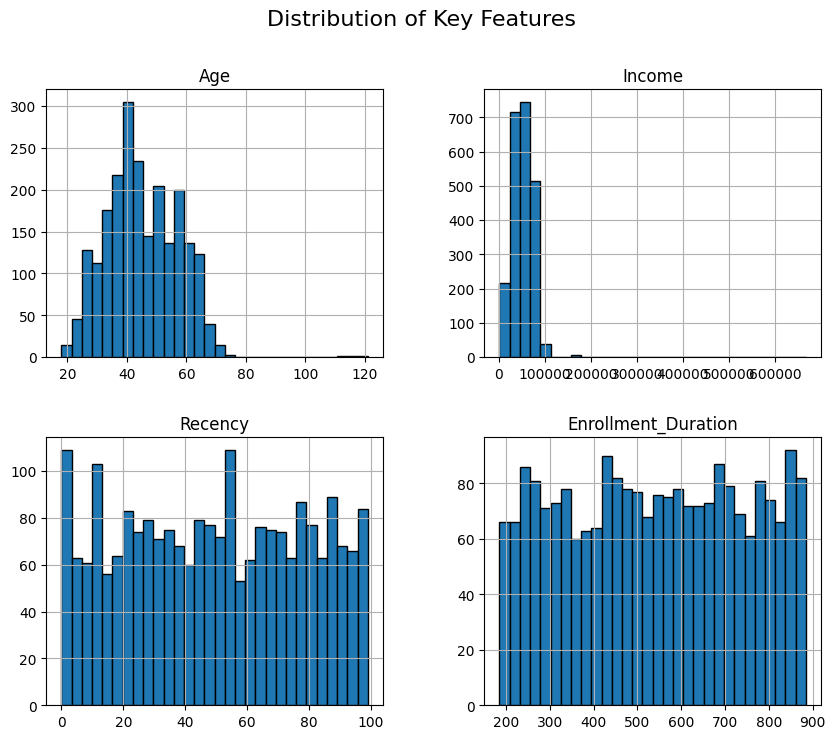

In [12]:
# 3. Exploratory Data Analysis (EDA)
# Histograms for distribution
num_features = ['Age', 'Income', 'Recency', 'Enrollment_Duration']
df[num_features].hist(figsize=(10, 8), bins=30, edgecolor='black')
plt.suptitle("Distribution of Key Features", fontsize=16)
plt.show()


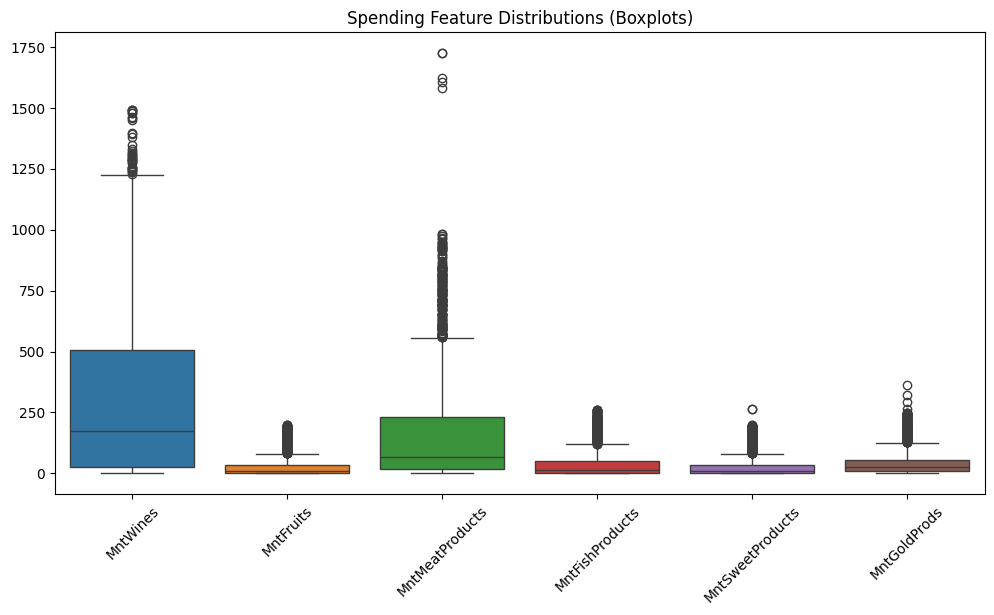

In [13]:
# Boxplots for spending features
spend_features = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
plt.figure(figsize=(12,6))
sns.boxplot(data=df[spend_features])
plt.xticks(rotation=45)
plt.title("Spending Feature Distributions (Boxplots)")
plt.show()

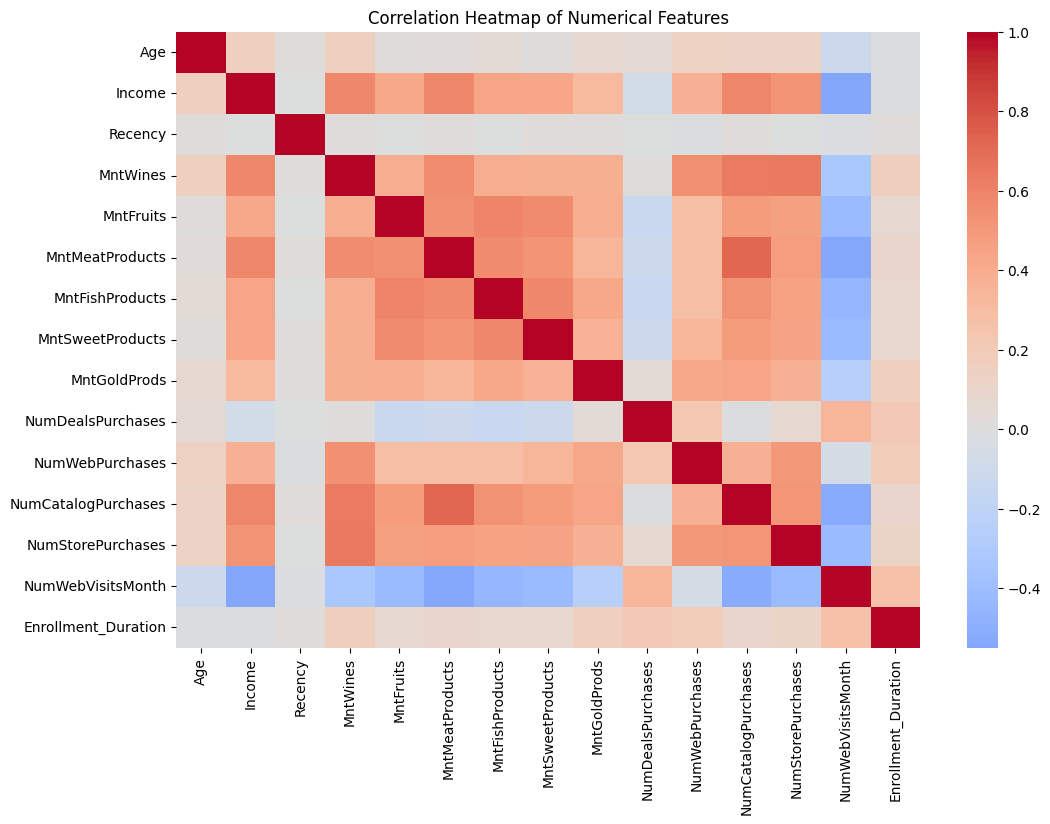

In [14]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[numerical_cols].corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


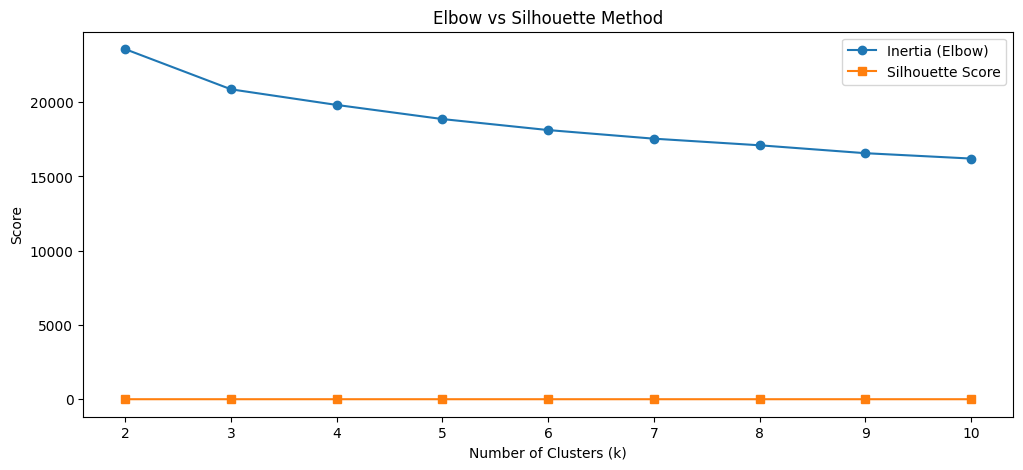

In [15]:
# 4. Customer Segmentation (Clustering)

kmeans_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_init=10, random_state=42))
])

# Elbow & Silhouette
inertia, silhouette = [], []
for k in range(2, 11):
    kmeans_pipeline.set_params(kmeans__n_clusters=k)
    kmeans_pipeline.fit(df[numerical_cols])
    inertia.append(kmeans_pipeline.named_steps['kmeans'].inertia_)
    silhouette.append(silhouette_score(
        kmeans_pipeline.named_steps['scaler'].transform(df[numerical_cols]),
        kmeans_pipeline.named_steps['kmeans'].labels_
    ))

plt.figure(figsize=(12,5))
plt.plot(range(2,11), inertia, marker='o', label="Inertia (Elbow)")
plt.plot(range(2,11), silhouette, marker='s', label="Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.title("Elbow vs Silhouette Method")
plt.legend()
plt.show()



In [16]:
# Apply KMeans with chosen k
optimal_clusters = 4
kmeans_pipeline.set_params(kmeans__n_clusters=optimal_clusters)
df['Cluster'] = kmeans_pipeline.fit_predict(df[numerical_cols])



In [17]:
# Cluster profiling
cluster_profiles = df.groupby('Cluster')[numerical_cols].mean()
print("Cluster Profiles:")
print(cluster_profiles)

Cluster Profiles:
               Age        Income    Recency    MntWines  MntFruits  \
Cluster                                                              
0        42.635294  35256.958333  49.244118   40.515686   4.961765   
1        48.792453  53748.472746  48.412998  428.113208  16.574423   
2        44.027119  75178.767797  47.928814  540.786441  96.183051   
3        47.957589  74185.735491  50.321429  615.508929  39.232143   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0              21.683333         6.978431          5.028431     15.000980   
1             115.194969        23.513627         17.314465     60.651992   
2             459.155932       131.884746        101.372881     95.650847   
3             360.383929        59.859375         38.678571     58.392857   

         NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
Cluster                       

In [18]:
# 5. Prediction Models (Classification)

# Target variable: High Spender
df['HighSpender'] = (df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
                     df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']) > \
                    df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1).median()
df['HighSpender'] = df['HighSpender'].astype(int)




In [19]:
# Predictors (exclude spending features to prevent leakage)
predictor_cols = ['Age','Income','Recency','NumDealsPurchases','NumWebPurchases',
                  'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
                  'Enrollment_Duration']

X_pred = df[predictor_cols]
y_pred = df['HighSpender']



In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_pred, y_pred, test_size=0.3, random_state=42, stratify=y_pred)


In [21]:
# Logistic Regression
lr_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', LogisticRegression(max_iter=500))])
lr_pipeline.fit(X_train, y_train)
y_lr = lr_pipeline.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, y_lr))
print(classification_report(y_test, y_lr))




Logistic Regression Accuracy: 0.9791666666666666
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       336
           1       0.99      0.97      0.98       336

    accuracy                           0.98       672
   macro avg       0.98      0.98      0.98       672
weighted avg       0.98      0.98      0.98       672



In [22]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf))
print(classification_report(y_test, y_rf))



Random Forest Accuracy: 0.9761904761904762
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       336
           1       0.97      0.98      0.98       336

    accuracy                           0.98       672
   macro avg       0.98      0.98      0.98       672
weighted avg       0.98      0.98      0.98       672



In [23]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_xgb = xgb.predict(X_test)
print("\nXGBoost Accuracy:", accuracy_score(y_test, y_xgb))
print(classification_report(y_test, y_xgb))


XGBoost Accuracy: 0.9732142857142857
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       336
           1       0.98      0.96      0.97       336

    accuracy                           0.97       672
   macro avg       0.97      0.97      0.97       672
weighted avg       0.97      0.97      0.97       672



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:46:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


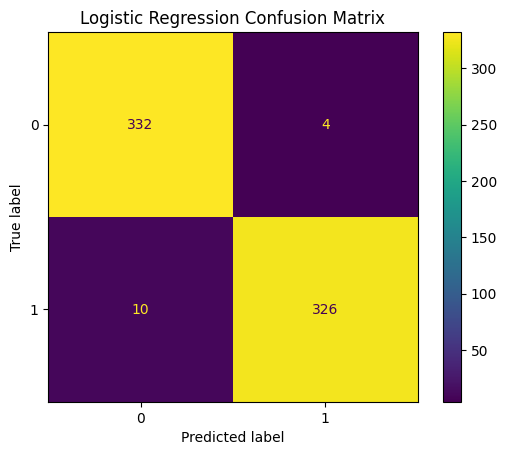

In [24]:
# 6. Confusion Matrices
# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_lr)
ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_pipeline.classes_).plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()


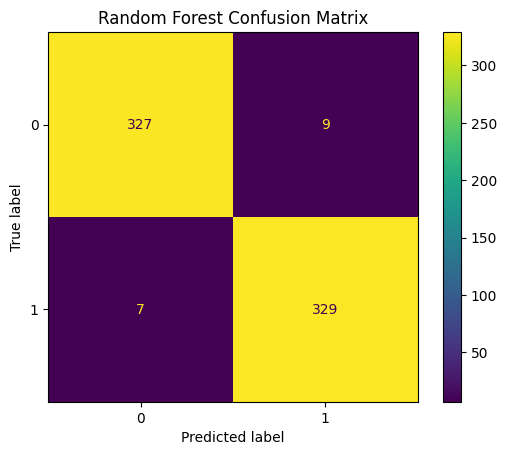

In [25]:
# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_rf)
ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_).plot()
plt.title('Random Forest Confusion Matrix')
plt.show()


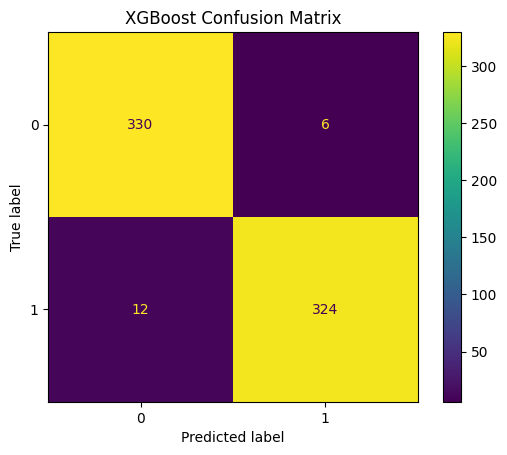

In [26]:
# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_xgb)
ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_).plot()
plt.title('XGBoost Confusion Matrix')
plt.show()

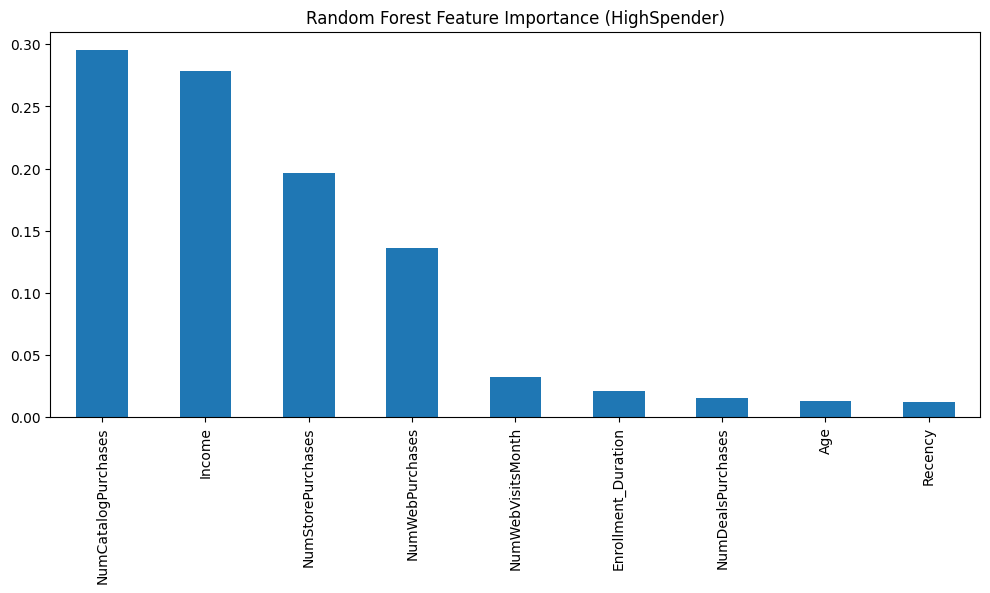

In [27]:
# 7. Feature Importances
# Random Forest
importances_rf = pd.Series(rf.feature_importances_, index=predictor_cols).sort_values(ascending=False)
plt.figure(figsize=(12,5))
importances_rf.plot(kind='bar')
plt.title("Random Forest Feature Importance (HighSpender)")
plt.show()

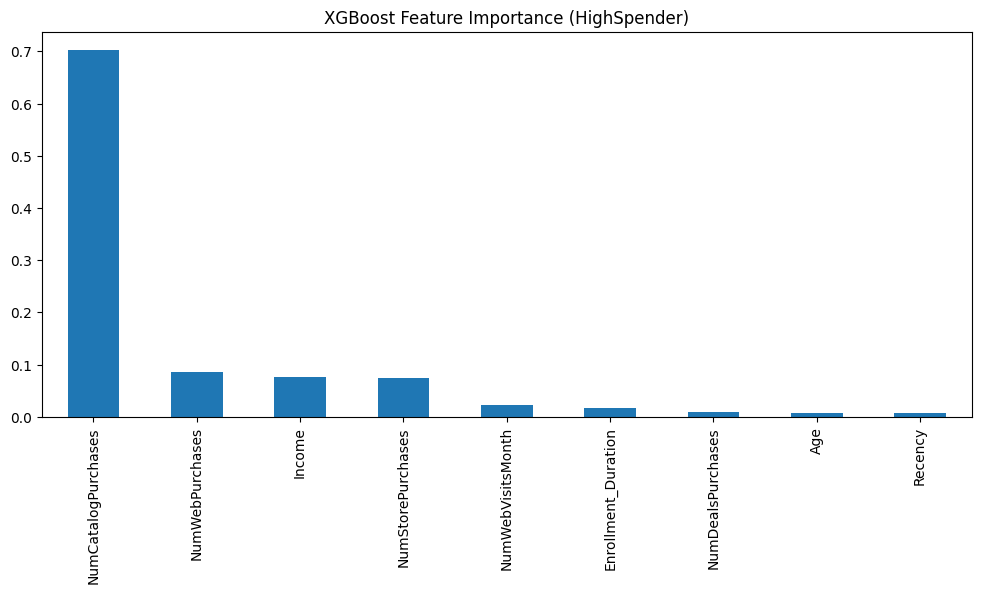

In [28]:
# XGBoost
importances_xgb = pd.Series(xgb.feature_importances_, index=predictor_cols).sort_values(ascending=False)
plt.figure(figsize=(12,5))
importances_xgb.plot(kind='bar')
plt.title("XGBoost Feature Importance (HighSpender)")
plt.show()